In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_card_fraud = pd.read_csv("creditcard.csv")

credit_card_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

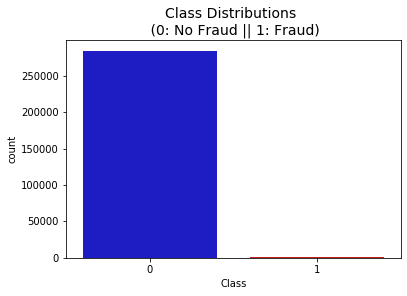

In [3]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=credit_card_fraud, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [4]:
credit_card_fraud.isnull().sum().max()

0

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(credit_card_fraud['Class'].value_counts()[0]/len(credit_card_fraud) * 100,2), '% of the dataset')
print('Frauds', round(credit_card_fraud['Class'].value_counts()[1]/len(credit_card_fraud) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:
len(credit_card_fraud)

284807

<function matplotlib.pyplot.show(*args, **kw)>

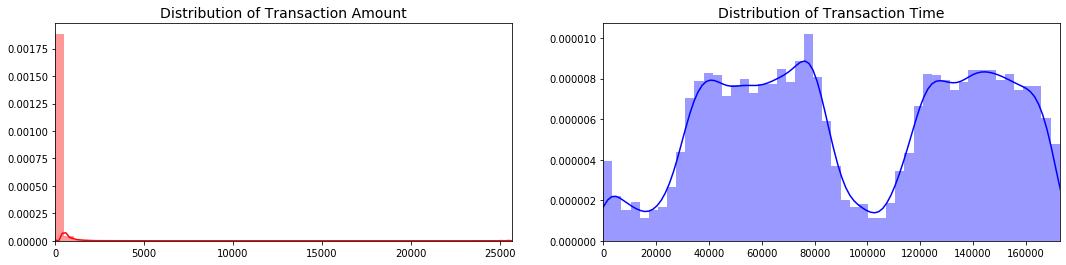

In [7]:
fig, ax = plt.subplots(1,2, figsize=(18, 4))
amount_val = credit_card_fraud['Amount'].values
time_val = credit_card_fraud['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show

In [8]:

#scaling the features Amount and Time 
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler= StandardScaler()
rob_scaler = RobustScaler()

credit_card_fraud['scaled_amount'] = rob_scaler.fit_transform(credit_card_fraud['Amount'].values.reshape(-1, 1))
credit_card_fraud['scaled_time'] = rob_scaler.fit_transform(credit_card_fraud['Time'].values.reshape(-1, 1))

credit_card_fraud.drop(['Amount', 'Time'], axis=1, inplace=True)

In [9]:
scaled_amount = credit_card_fraud['scaled_amount']
scaled_time = credit_card_fraud['scaled_time']

credit_card_fraud.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card_fraud.insert(0, 'scaled_amount', scaled_amount)
credit_card_fraud.insert(1, 'scaled_time', scaled_time)


credit_card_fraud.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
x = credit_card_fraud.drop('Class', axis=1)
x.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [11]:
y = credit_card_fraud["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
#The original dataset is slpit into train and test

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
print('No Fraud', round(credit_card_fraud['Class'].value_counts()[0]/len(credit_card_fraud)*100,2), '% of the dataset')
print('Fraud', round(credit_card_fraud['Class'].value_counts()[1]/len(credit_card_fraud)*100,2), '% of the dataset')

sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
for train_index, test_index in sss.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    initial_xtrain, initial_xtest = x.iloc[train_index], x.iloc[test_index]
    initial_ytrain, initial_ytest = y.iloc[train_index], y.iloc[test_index]
    
initial_xtrain = initial_xtrain.values
initial_xtest = initial_xtest.values
initial_ytrain = initial_ytrain.values
initial_ytest = initial_ytest.values

train_unique_label, train_counts_label = np.unique(initial_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(initial_ytest, return_counts=True)

print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(initial_ytrain))
print(test_counts_label/ len(initial_ytest))

No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [13]:
#A new undersampled dataset is created

credit_card_fraud = credit_card_fraud.sample(frac=1)

fraud_class = credit_card_fraud.loc[credit_card_fraud['Class'] == 1]
non_fraud_class = credit_card_fraud.loc[credit_card_fraud['Class'] == 0] [:492]

normal_fraud_dataset = pd.concat([fraud_class, non_fraud_class])

new_fraud_dataset = normal_fraud_dataset.sample(frac = 1, random_state=42)
new_fraud_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
20060,0.491861,-0.633642,-0.661993,0.755191,1.127012,0.984521,0.261441,0.567644,0.583195,0.162989,...,-0.206102,0.050272,0.286726,-0.188957,-0.303501,-0.330027,-0.335167,-0.030379,0.131160,0
20198,1.157130,-0.632526,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,...,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,1
122208,0.129952,-0.096535,1.038217,-0.422507,1.494017,1.622339,-1.048992,0.899944,-0.946641,0.443759,...,-0.121611,-0.144151,-0.022613,-0.118110,0.037402,0.536382,-0.321107,0.088366,0.026518,0
15781,1.089779,-0.675208,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1
248971,-0.296793,0.816375,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,...,0.126518,0.364130,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


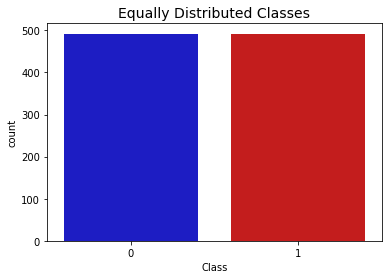

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(new_fraud_dataset['Class'].value_counts()/ len(new_fraud_dataset))

sns.countplot('Class', data=new_fraud_dataset, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Text(0.5, 1, 'Correlation matrix from New Fraud Dataset')

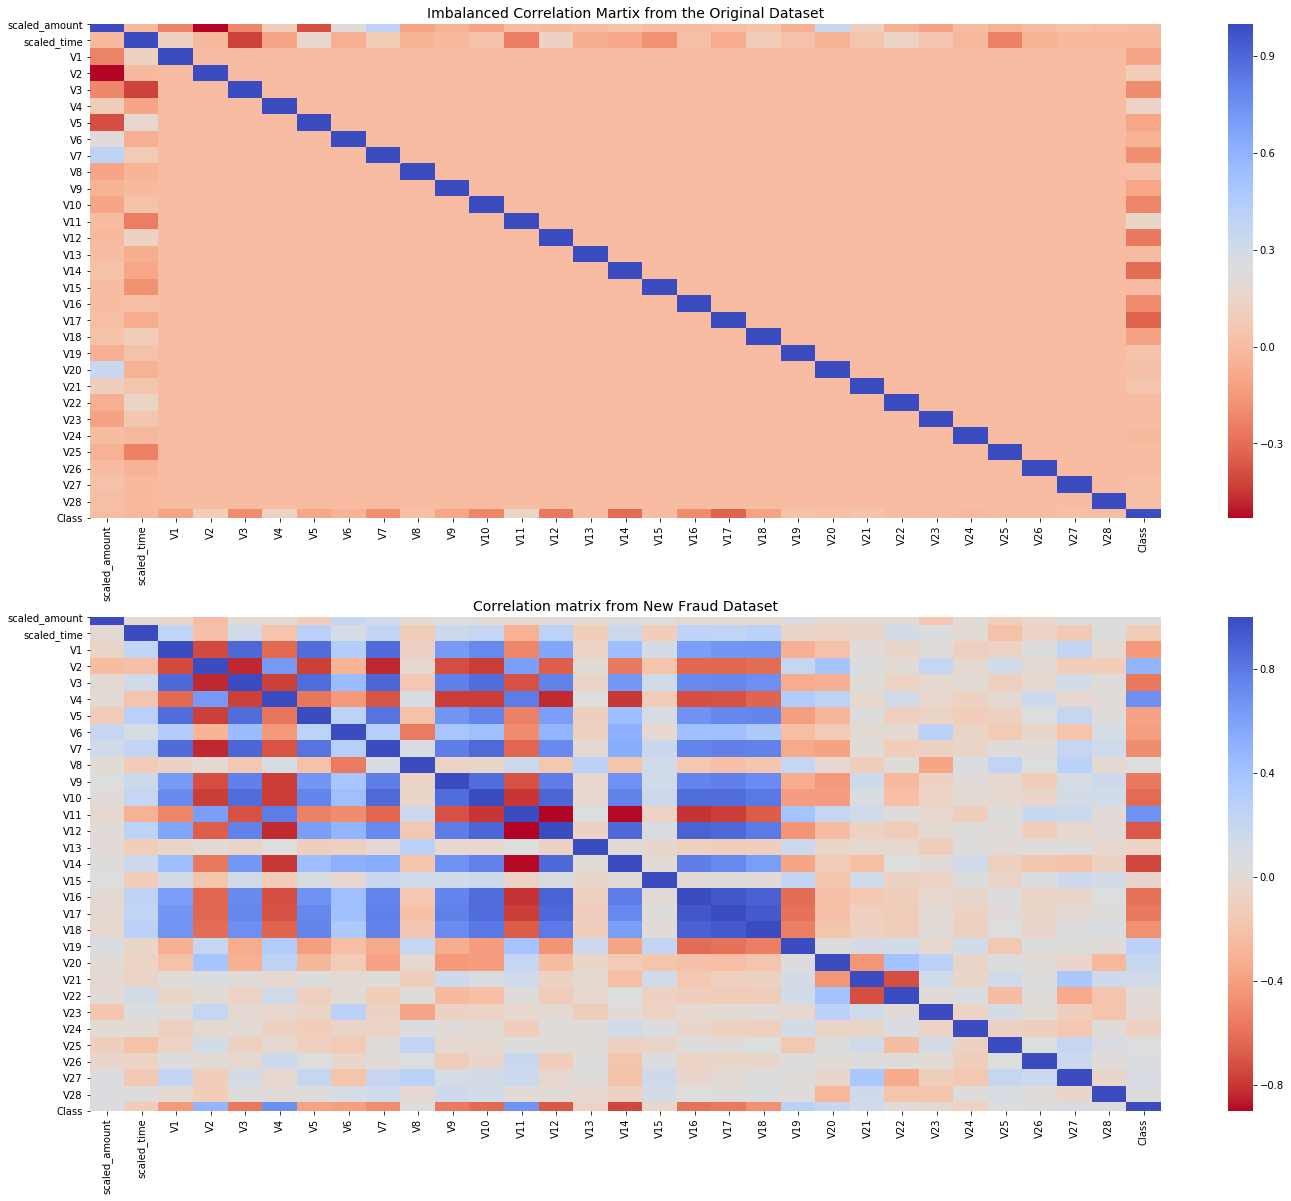

In [15]:
f, (ax1, ax2)= plt.subplots(2,1, figsize=(24,20))

#Correlation code

corr = credit_card_fraud.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Martix from the Original Dataset", fontsize=14)

sub_sample_corr = new_fraud_dataset.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("Correlation matrix from New Fraud Dataset", fontsize=14)

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

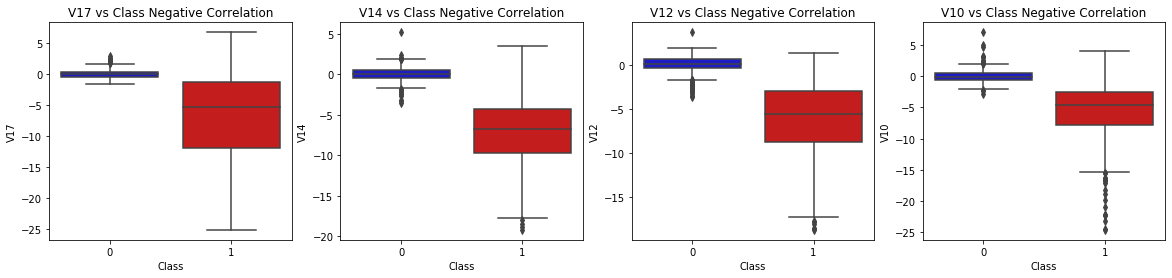

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_fraud_dataset, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_fraud_dataset, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_fraud_dataset, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_fraud_dataset, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

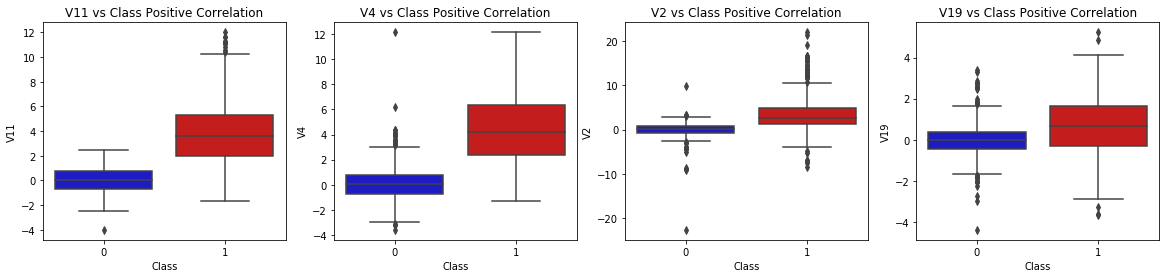

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=new_fraud_dataset, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=new_fraud_dataset, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=new_fraud_dataset, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=new_fraud_dataset, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

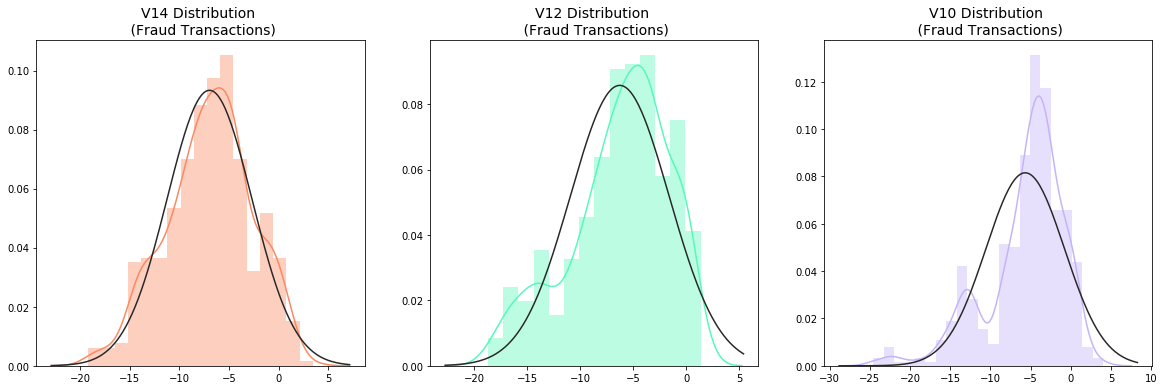

In [18]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_fraud_dataset['V14'].loc[new_fraud_dataset['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_fraud_dataset['V12'].loc[new_fraud_dataset['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_fraud_dataset['V10'].loc[new_fraud_dataset['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [19]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_fraud_dataset['V14'].loc[new_fraud_dataset['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_fraud_dataset = new_fraud_dataset.drop(new_fraud_dataset[(new_fraud_dataset['V14'] > v14_upper) | (new_fraud_dataset['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_fraud_dataset['V12'].loc[new_fraud_dataset['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_fraud_dataset = new_fraud_dataset.drop(new_fraud_dataset[(new_fraud_dataset['V12'] > v12_upper) | (new_fraud_dataset['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_fraud_dataset)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_fraud_dataset['V10'].loc[new_fraud_dataset['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_fraud_dataset = new_fraud_dataset.drop(new_fraud_dataset[(new_fraud_dataset['V10'] > v10_upper) | (new_fraud_dataset['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_fraud_dataset)))
print('----' * 44)


Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.8220867423816, -18.049997689859396, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.047596570821604, -18.553697009645802, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-22.1870885620007, -

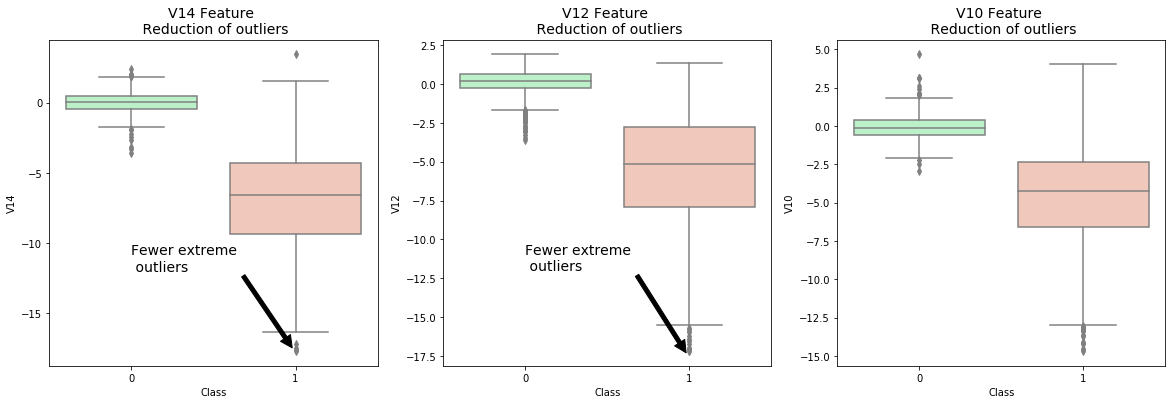

In [20]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_fraud_dataset,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_fraud_dataset, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_fraud_dataset, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [21]:
# New_fraud_dataset is from the random undersample data (fewer instances)
X = new_fraud_dataset.drop('Class', axis=1)
y = new_fraud_dataset['Class']



In [22]:
#Importing Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [23]:
x = new_fraud_dataset.drop('Class', axis=1)
y = new_fraud_dataset['Class']

In [24]:
# The data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [26]:
classifiers = {
    "LogisiticRegression": LogisticRegression(solver='liblinear'),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(gamma='scale'),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

def fit_and_score(classifiers, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    classifier_scores = {}
    
    for name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        classifier_scores[name] = classifier.score(x_test, y_test)
    return classifier_scores

In [27]:
classifier_scores = fit_and_score(classifiers=classifiers,
                              x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
classifier_scores

{'LogisiticRegression': 0.9368421052631579,
 'KNearest': 0.9210526315789473,
 'Support Vector Classifier': 0.9105263157894737,
 'DecisionTreeClassifier': 0.9105263157894737}

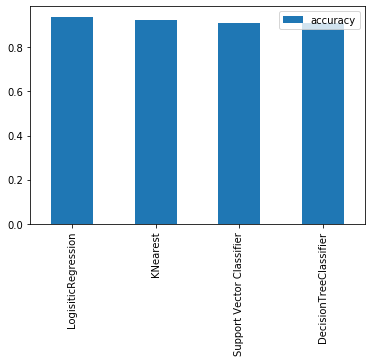

In [28]:
classifier_compare = pd.DataFrame(classifier_scores, index=['accuracy'])
classifier_compare.T.plot.bar();

In [29]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [30]:
from sklearn.model_selection import GridSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [31]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [32]:

# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.9315789473684211

In [33]:
#Hyperparameter Tuning with GridSearchCV

# Logistic Regression 

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)


knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
gs_knears.fit(x_train, y_train)


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
gs_svc = GridSearchCV(SVC(gamma='scale'), svc_params)
gs_svc.fit(x_train, y_train)

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
gs_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
gs_tree.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2,

In [34]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
gs_knears.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [36]:
gs_svc.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [37]:
gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [38]:
gs_log_reg.score(x_test, y_test)

0.9315789473684211

In [39]:
gs_knears.score(x_test, y_test)

0.9421052631578948

In [40]:
gs_svc.score(x_test, y_test)

0.9368421052631579

In [41]:
gs_tree.score(x_test, y_test)

0.868421052631579

In [42]:
# Make preidctions on test data
log_reg_pred = gs_log_reg.predict(x_test)

In [43]:
knears_pred = gs_knears.predict(x_test)

In [44]:
svc_pred = gs_svc.predict(x_test)

In [45]:
tree_pred = gs_tree.predict(x_test)

In [46]:
y_test

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [47]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(gs_log_reg, x_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(gs_knears, x_train, y_train, cv=5)

svc_pred = cross_val_predict(gs_svc, x_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(gs_tree, x_train, y_train, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [48]:

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9700408853799521
KNears Neighbors:  0.9256661497250811
Support Vector Classifier:  0.9695756379529114
Decision Tree Classifier:  0.9184407161990695


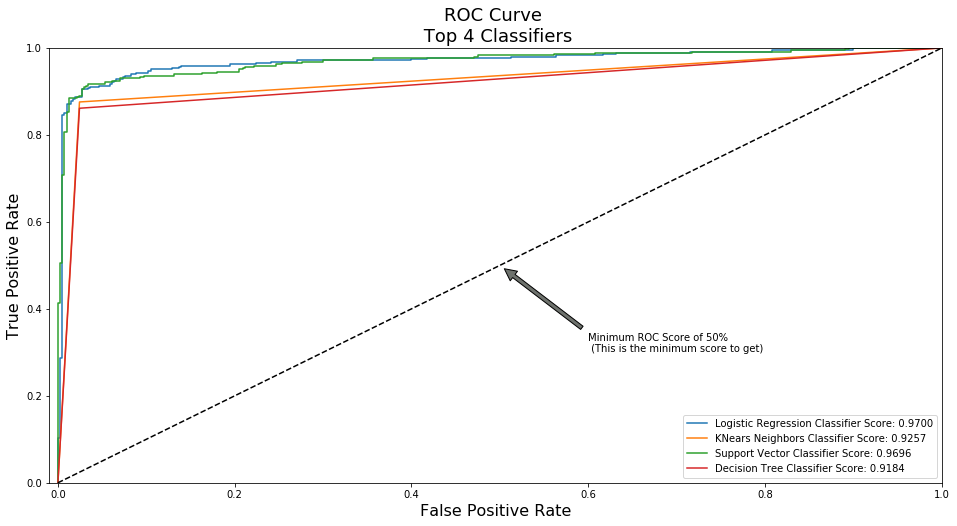

In [49]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

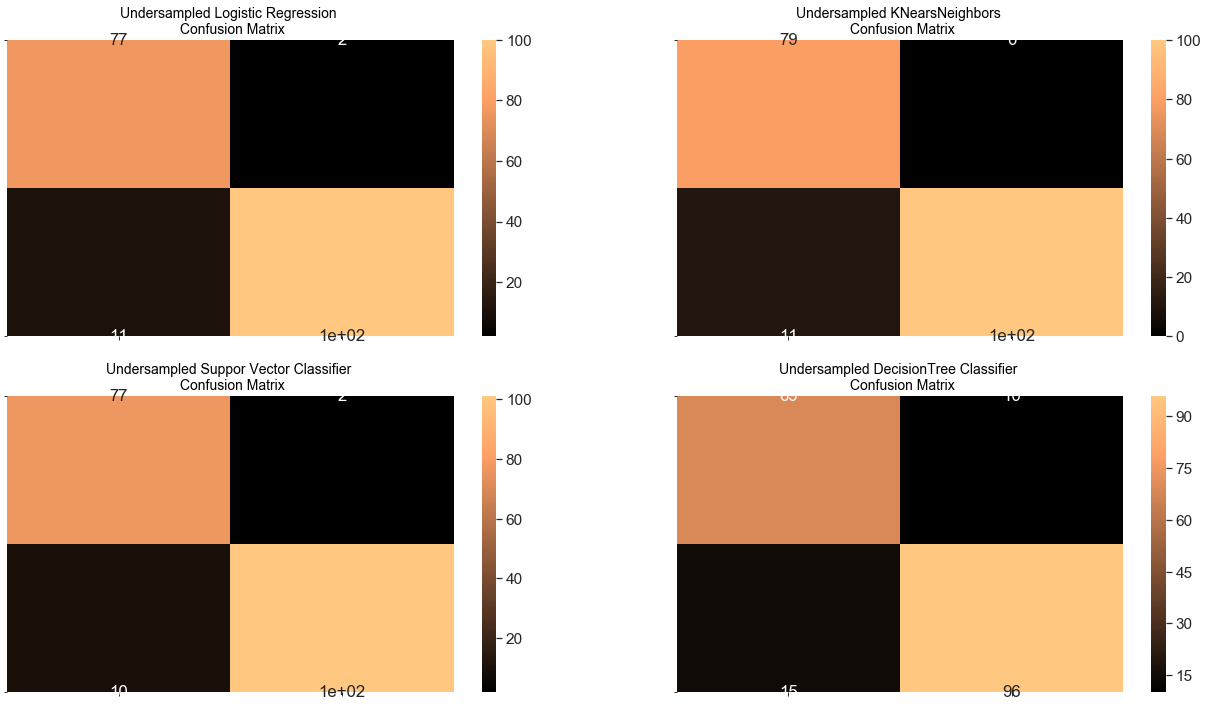

In [50]:
from sklearn.metrics import confusion_matrix


# Other models fitted with UnderSampling
log_reg_pred = gs_log_reg.predict(x_test)
knear_pred = gs_knears.predict(x_test)
svc_pred = gs_svc.predict(x_test)
tree_pred = gs_tree.predict(x_test)


undersampled_log_reg = confusion_matrix(y_test, log_reg_pred)
undersampled_kneighbors = confusion_matrix(y_test, knear_pred)
undersampled_svc = confusion_matrix(y_test, svc_pred)
undersampled_tree = confusion_matrix(y_test, tree_pred)

fig, ax = plt.subplots(2, 2,figsize=(22,12))
sns.set(font_scale=1.4)
sns.heatmap(undersampled_log_reg, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Undersampled Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(undersampled_kneighbors, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Undersampled KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(undersampled_svc, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Undersampled Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(undersampled_tree, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Undersampled DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['',''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['',''], fontsize=14, rotation=360)


plt.show()

In [51]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

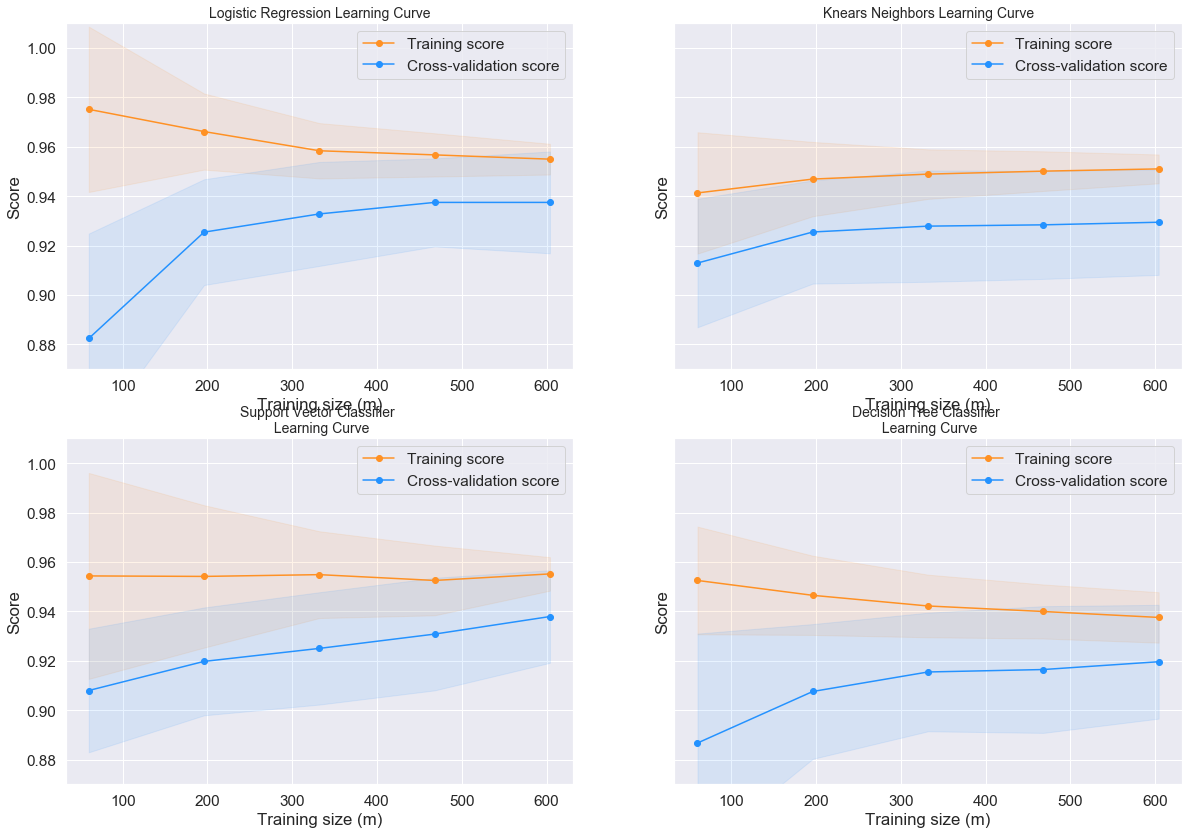

In [52]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(gs_log_reg, gs_knears, gs_svc, gs_tree, x_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [53]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=3792.690190732246,
                         solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.93157895, 0.95767196, 0.94179894, 0.93650794, 0.91005291])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9355221386800334

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9573179968331207

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


0.9081462016244626

In [59]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision


0.9573179968331207

In [60]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9316921084779629

In [61]:
labels = ['No Fraud', 'Fraud']
undersampling_prediction = log_reg_pred
print(classification_report(y_test, undersampling_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.88      0.97      0.92        79
       Fraud       0.98      0.90      0.94       111

    accuracy                           0.93       190
   macro avg       0.93      0.94      0.93       190
weighted avg       0.94      0.93      0.93       190



In [62]:
#SMOTE OVERSAMPLIING WITH INITIAL DATASET

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(initial_xtrain), len(initial_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(initial_xtest), len(initial_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression().fit(initial_xtrain, initial_ytrain)

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_grid, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(initial_xtrain, initial_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(initial_xtrain[train], initial_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(initial_xtrain[test])
    
    accuracy_lst.append(pipeline.score(initial_xtrain[test], initial_ytrain[test]))
    precision_lst.append(precision_score(initial_ytrain[test], prediction))
    recall_lst.append(recall_score(initial_ytrain[test], prediction))
    f1_lst.append(f1_score(initial_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(initial_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9634492720294967
precision: 0.06074099664442502
recall: 0.9162934112301201
f1: 0.11261025856894687
---------------------------------------------------------------------------------------------------------------------------------------


In [63]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(initial_xtest)
print(classification_report(initial_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.08      0.86      0.14        98

    accuracy                           0.98     56961
   macro avg       0.54      0.92      0.57     56961
weighted avg       1.00      0.98      0.99     56961



In [64]:
y_score = best_est.decision_function(initial_xtest)

In [65]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(initial_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.71


In [67]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(x_train, y_train)


# This will be the data were we are going to 
xsm_train, ysm_train = sm.fit_sample(initial_xtrain, initial_ytrain)

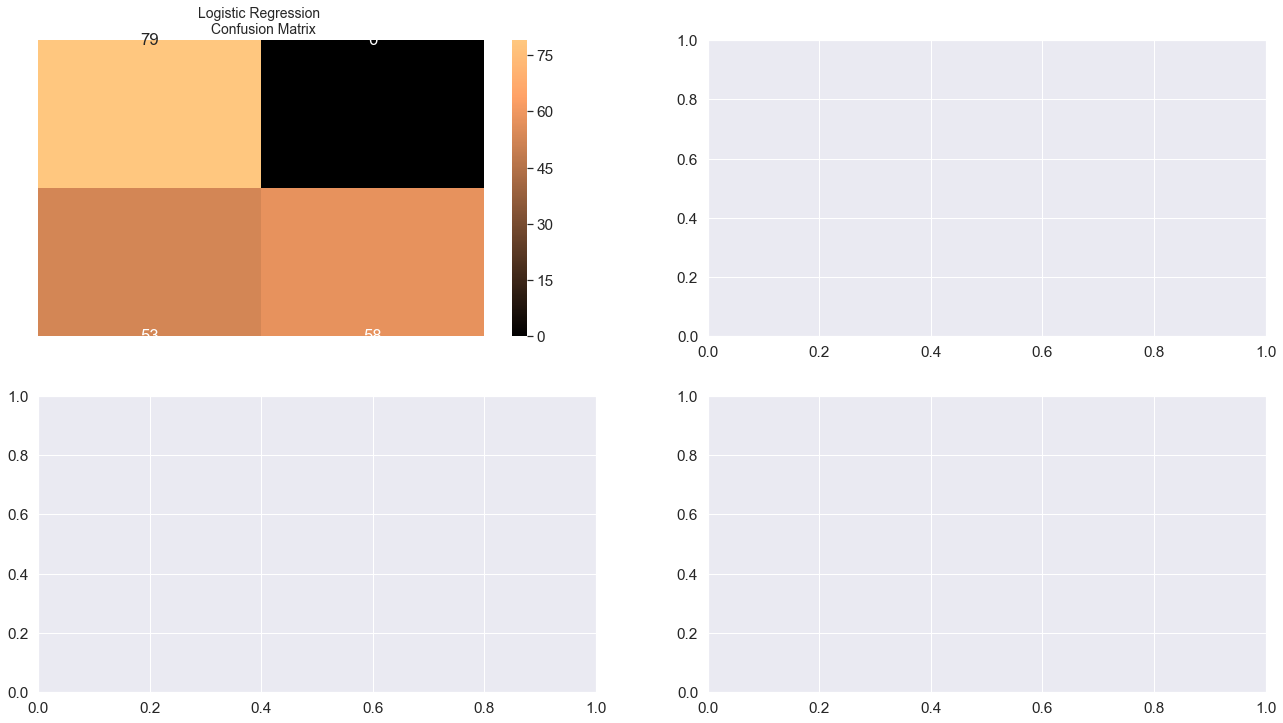

In [68]:
from sklearn.metrics import confusion_matrix


# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(x_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)


fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)



plt.show()